<a href="https://colab.research.google.com/github/rodrimdz/Hourly-Energy-Consumption/blob/gh-pages/copiaengithub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from datetime import datetime
import seaborn as sns
import matplotlib.dates
from sklearn.datasets import load_iris
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [26]:
data=pd.read_csv("https://github.com/rodrimdz/Hourly-Energy-Consumption/blob/gh-pages/AEP_hourly.csv?raw=true")
data.iloc[::-1]
data.shape


(121273, 2)

In [27]:
data.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [28]:
data.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [5]:
data[data["AEP_MW"] == data["AEP_MW"].max()]

,Datetime,AEP_MW
30221,2008-10-20 14:00:00,25695.0


In [6]:
data[data["AEP_MW"] == data["AEP_MW"].min()]

,Datetime,AEP_MW
100759,2016-10-02 05:00:00,9581.0


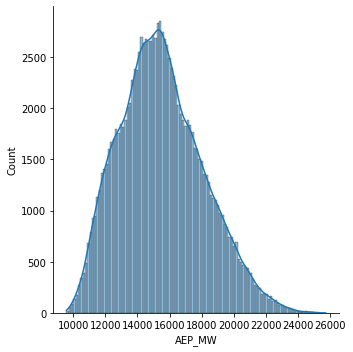

In [7]:
sns.displot(data=data, x=data["AEP_MW"], kde=True)

In [37]:
data["New_Date"] = pd.to_datetime(data["Datetime"]).dt.date
data["New_Time"] = pd.to_datetime(data["Datetime"]).dt.time
data["Time"]=data["New_Time"].astype("string")
times=data["Time"].str.split(":",1, expand = True)
data["Time"]=times[0]
data["Time"]=pd.to_numeric(data["Time"])
data["Year"] = pd.DatetimeIndex(data['New_Date']).year
data["Month"] = pd.DatetimeIndex(data['New_Date']).month
data.head()

,Datetime,AEP_MW,New_Date,New_Time,Time,Year,Month
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,1,2004,12
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,2,2004,12
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00,3,2004,12
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00,4,2004,12
4,2004-12-31 05:00:00,12670.0,2004-12-31,05:00:00,5,2004,12


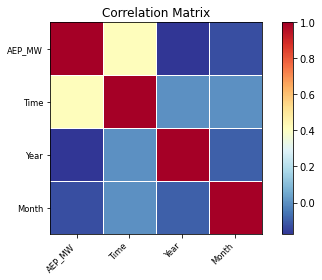

In [38]:
corr = data.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

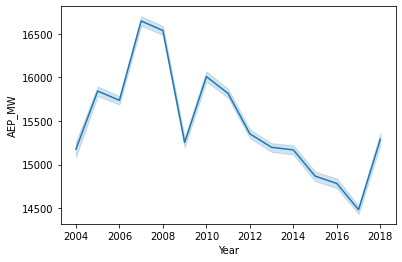

In [9]:
sns.lineplot(x=data["Year"],y=data["AEP_MW"], data=data)

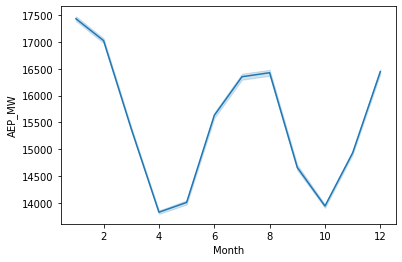

In [10]:
sns.lineplot(x=data["Month"],y=data["AEP_MW"])

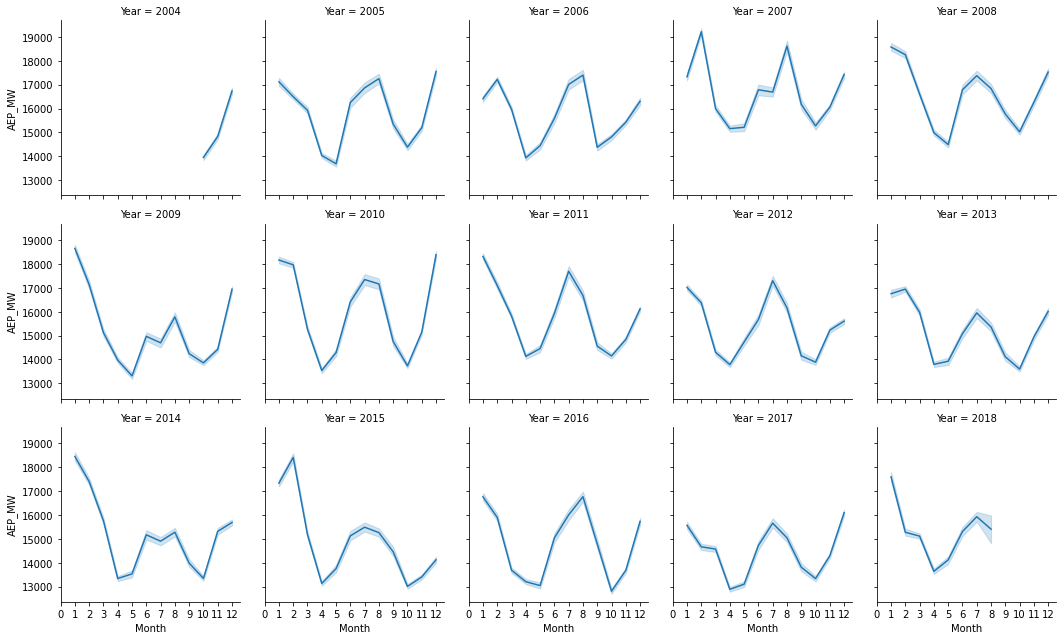

In [11]:
g=sns.relplot(x=data["Month"],y=data["AEP_MW"], col=data["Year"],kind="line",col_wrap=5, height=3)
g.set(xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12])

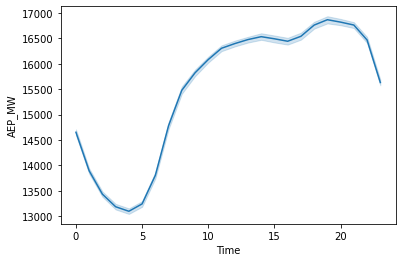

In [39]:
sns.lineplot(x=data["Time"],y=data["AEP_MW"])

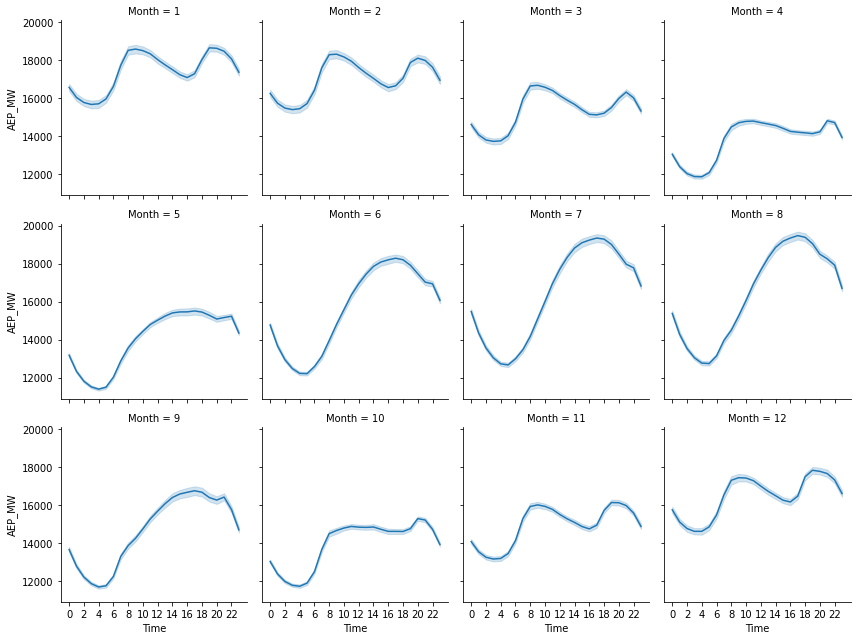

In [40]:
g=sns.relplot(x=data["Time"],y=data["AEP_MW"], col=data["Month"],kind="line",col_wrap=4, height=3)
g.set(xticks=[0,2,4,6,8,10,12,14,16,18,20,22])

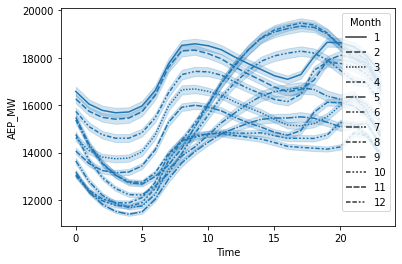

In [41]:
  sns.lineplot(x=data["Time"],y=data["AEP_MW"],style=data["Month"])

In [15]:
##Regression 


,AEP_MW,Month,Year
Year,,,
2004,15176.724388,11.000907,2004
2005,15842.990865,6.525919,2005
2006,15737.224252,6.525919,2006
2007,16645.519297,6.525919,2007
2008,16536.655659,6.513550,2008


In [42]:
year=data.groupby(["Year"]).mean()
year["Year"]=year.index

x=year["Year"]
y=year["AEP_MW"]
x=x[:,np.newaxis]
lm=LinearRegression()
lm.fit(x,y)
lm.score(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


0.39242384052968715

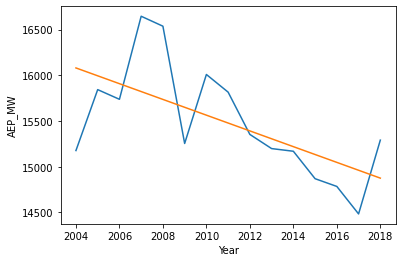

In [19]:
sns.lineplot(x=year["Year"],y=year["AEP_MW"], data=year)
sns.lineplot(x=year["Year"],y=lm.predict(x))

In [20]:
def regresion_validation(x,y,y_pred):
    SSD=np.sum((y-lm.predict(x))**2)
    RSE=np.sqrt(SSD/(len(x)-1))
    y_mean=np.mean(y)
    error=RSE/y_mean
    print("Score: "+str(lm.score(x,y)))
    print("SSD: "+str(SSD)+", RSE: "+str(RSE)+", y_mean: "+str(y_mean)+", error: "+str(error*100)+"\n")

Regression grade 1
Score: 0.39242384052968715
SSD: 3211568.7056564363, RSE: 478.9548670696911, y_mean: 15477.66439433448, error: 3.0944905824745113

Regression grade 2
Score: 0.47838243384854573
SSD: 2757202.7402015594, RSE: 443.7826640051862, y_mean: 15477.66439433448, error: 2.867245681897784

Regression grade 3
Score: 0.7364689147059085
SSD: 1392991.1062277867, RSE: 315.43519894037854, y_mean: 15477.66439433448, error: 2.038002575219566

Regression grade 4
Score: 0.736458915348047
SSD: 1393043.961535363, RSE: 315.44118328092287, y_mean: 15477.66439433448, error: 2.0380412395838516



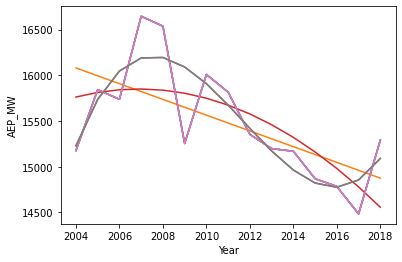

In [21]:
for d in range(1,5):
    poly =PolynomialFeatures(degree=d)
    xpoly=poly.fit_transform(x)
    lm=linear_model.LinearRegression()
    lm.fit(xpoly,y)
    print("Regression grade "+str(d))
    regresion_validation(xpoly,y,lm.predict(xpoly))
    sns.lineplot(x=year["Year"],y=year["AEP_MW"], data=year)
    sns.lineplot(x=year["Year"],y=lm.predict(poly.fit_transform(x)))